In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"irtnm8210","key":"dc8e20fa95030bd37d98c83f1643071f"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c classification-of-plants-of-southeast-asia

100% 3.81G/3.81G [00:26<00:00, 197MB/s]
100% 3.81G/3.81G [00:26<00:00, 155MB/s]


In [7]:
import zipfile
from pathlib import Path

In [8]:
!pwd

/content


In [9]:
!ls

classification-of-plants-of-southeast-asia.zip	kaggle.json  sample_data


In [10]:
UNZIPPED_DATAPATH = Path("/content")

In [11]:
IMAGE_PATH = UNZIPPED_DATAPATH / "Bali26"

if IMAGE_PATH.is_dir():
  print(f"The {IMAGE_PATH} directory exists")
else:
  print(f"The {IMAGE_PATH} directory not found, creating one...")
  IMAGE_PATH.mkdir(parents=True, exist_ok=True)
  # Unzip Bali26 dataset
  with zipfile.ZipFile(UNZIPPED_DATAPATH / "classification-of-plants-of-southeast-asia.zip", "r") as zip_ref:
    print("Unzipping Bali26 dataset...") 
    zip_ref.extractall(path=IMAGE_PATH)
    print("Finish!")

The /content/Bali26 directory not found, creating one...
Unzipping Bali26 dataset...
Finish!


In [12]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [13]:
walk_through_dir(IMAGE_PATH)

There are 2 directories and 1 images in '/content/Bali26'.
There are 1 directories and 0 images in '/content/Bali26/bali-26_test'.
There are 0 directories and 4624 images in '/content/Bali26/bali-26_test/bali-26_test'.
There are 1 directories and 0 images in '/content/Bali26/bali-26_train'.
There are 26 directories and 0 images in '/content/Bali26/bali-26_train/bali-26_train'.
There are 0 directories and 1957 images in '/content/Bali26/bali-26_train/bali-26_train/vanilla'.
There are 0 directories and 1409 images in '/content/Bali26/bali-26_train/bali-26_train/whitepepper'.
There are 0 directories and 1624 images in '/content/Bali26/bali-26_train/bali-26_train/mangosteen'.
There are 0 directories and 1116 images in '/content/Bali26/bali-26_train/bali-26_train/lychee'.
There are 0 directories and 1242 images in '/content/Bali26/bali-26_train/bali-26_train/nilam'.
There are 0 directories and 1682 images in '/content/Bali26/bali-26_train/bali-26_train/cacao'.
There are 0 directories and 13

In [14]:
train_dir = IMAGE_PATH / "bali-26_train" / "bali-26_train"
test_dir = IMAGE_PATH / "bali-26_test" / "bali-26_test"

train_dir, test_dir

(PosixPath('/content/Bali26/bali-26_train/bali-26_train'),
 PosixPath('/content/Bali26/bali-26_test/bali-26_test'))

In [15]:
import random
from PIL import Image

# Set seed
random.seed(1) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(IMAGE_PATH.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

Output hidden; open in https://colab.research.google.com to view.

In [16]:
from torchvision import datasets, transforms

# TRAIN DATA TRANSFORMS
train_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# TEST DATA TRANSFORMS
val_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [17]:
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                            transform=train_transforms, # transforms to perform on data (images)
                            target_transform=None) # transforms to perform on labels (if necessary)
val_data = datasets.ImageFolder(root=train_dir, # target folder of images
                            transform=val_transforms, # transforms to perform on data (images)
                            target_transform=None)

print(f"Dataset:\n{train_data}")

Dataset:
Dataset ImageFolder
    Number of datapoints: 41607
    Root location: /content/Bali26/bali-26_train/bali-26_train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [18]:
class_names = train_data.classes
class_names

['bamboo',
 'banana',
 'cacao',
 'cinnamon',
 'coffeearabica',
 'dragonfruit',
 'durian',
 'frangipani',
 'guava',
 'jackfruit',
 'lychee',
 'mango',
 'mangosteen',
 'nilam',
 'papaya',
 'passiflora',
 'sawo',
 'snakefruit',
 'starfruit',
 'sugarpalm',
 'suweg',
 'taro',
 'vanilla',
 'waterguava',
 'whitepepper',
 'zodia']

In [19]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'bamboo': 0,
 'banana': 1,
 'cacao': 2,
 'cinnamon': 3,
 'coffeearabica': 4,
 'dragonfruit': 5,
 'durian': 6,
 'frangipani': 7,
 'guava': 8,
 'jackfruit': 9,
 'lychee': 10,
 'mango': 11,
 'mangosteen': 12,
 'nilam': 13,
 'papaya': 14,
 'passiflora': 15,
 'sawo': 16,
 'snakefruit': 17,
 'starfruit': 18,
 'sugarpalm': 19,
 'suweg': 20,
 'taro': 21,
 'vanilla': 22,
 'waterguava': 23,
 'whitepepper': 24,
 'zodia': 25}

In [20]:
SPLIT_RATIO = 0.1
DATASET_SIZE = len(train_data)
VAL_SIZE = int(DATASET_SIZE * 0.1)
TRAIN_SIZE = DATASET_SIZE - VAL_SIZE
print(f"Training set size: {TRAIN_SIZE}\nValidation set size: {VAL_SIZE}")

Training set size: 37447
Validation set size: 4160


In [21]:
from torch.utils.data import random_split

train_data, _ = random_split(dataset=train_data, lengths=[TRAIN_SIZE, VAL_SIZE])
_, val_data = random_split(dataset=val_data, lengths=[TRAIN_SIZE, VAL_SIZE])

In [22]:
assert len(train_data) + len(val_data) == DATASET_SIZE, "Something wrong"

In [23]:
os.cpu_count()

2

In [24]:
import torch

def collate_fn(data):
  pixel_values = torch.stack([data[i][0] for i in range(len(data))])
  labels = torch.Tensor([data[i][1] for i in range(len(data))])

  return pixel_values, labels

In [25]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS - 1,
                              collate_fn=collate_fn,
                              timeout=20)
val_dataloader = DataLoader(dataset=val_data, 
                            batch_size=BATCH_SIZE, 
                            shuffle=False, 
                            num_workers=NUM_WORKERS - 1,
                            collate_fn=collate_fn,
                            timeout=20)

In [26]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, val_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(val_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f84b32e0990>, <torch.utils.data.dataloader.DataLoader object at 0x7f84b32e09d0>)
Length of train dataloader: 1171 batches of 32
Length of test dataloader: 130 batches of 32


In [27]:
NUM_CLASSES = len(class_names)

assert NUM_CLASSES == 26, "Wrong NUM_CLASSES"

In [28]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


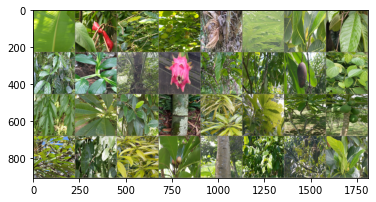

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.models import mobilenet_v3_large, MobileNet_V3_Large_Weights

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(val_dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out)

In [30]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 26.2 MB/s 


In [31]:
from torchmetrics import Accuracy

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    train_loss, train_acc = 0, 0
    # Put model and accuracy function on the same device
    model, accuracy_fn = model.to(device), accuracy_fn.to(device)
    # Put model in training mode
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # Send data to device
        y = y.type(torch.LongTensor)
        X, y = X.to(device), y.to(device)
        
        # Forward
        y_preds = model(X)

        # Calculate loss
        loss = loss_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy_fn(y_preds, y)
        
        # Zero gradient
        optimizer.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # One step gradient
        optimizer.step()
    # Calculating loss and accuracy
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc * 100:.2f}%")

    return train_loss, train_acc

In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device,
              accuracy_fn):
    test_loss, test_acc = 0, 0
    # Put model and accuracy function on the same device
    model, accuracy_fn = model.to(device), accuracy_fn.to(device)
    # Put model in evaluation mode
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Put data in the same device
            y = y.type(torch.LongTensor)
            X, y = X.to(device), y.to(device)
            
            # Forward pass
            y_preds = model(X)
            # Calculating accumulative loss
            loss = loss_fn(y_preds, y)
            test_loss += loss
            test_acc += accuracy_fn(y_preds, y)
        # Calculating loss on batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Val loss: {test_loss:.5f} | Val accuracy: {test_acc * 100:.2f}%")
        
    return test_loss, test_acc

In [33]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

def training_timer(start: float, end: float, device: torch.device = None):
    total_training_time = end - start
    print(f"Training time: {total_training_time:.3f} seconds")
    return total_training_time

def visualize_model(model, device: torch.device, num_images=6, dataloader: torch.utils.data.DataLoader=val_dataloader):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {classes[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [34]:
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.models import efficientnet_b7, EfficientNet_B7_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"
CHANNELS, HEIGHT, WIDTH = 3, 224, 224

pretrained_model = torchvision.models.efficientnet_b7(weights=EfficientNet_B7_Weights.IMAGENET1K_V1)

for param in pretrained_model.parameters():
  param.requires_grad = False
# TRANSFER LEARNING
pretrained_model.classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=2560, out_features=NUM_CLASSES)
)
# PUT ALL TENSORS TO DEVICE
pretrained_model.to(device)
# MODEL SUMMARY
print(summary(model=pretrained_model, input_size=(CHANNELS, HEIGHT, WIDTH), batch_size=BATCH_SIZE, device=device))

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-dcc49843.pth


  0%|          | 0.00/255M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 112, 112]           1,728
       BatchNorm2d-2         [32, 64, 112, 112]             128
              SiLU-3         [32, 64, 112, 112]               0
            Conv2d-4         [32, 64, 112, 112]             576
       BatchNorm2d-5         [32, 64, 112, 112]             128
              SiLU-6         [32, 64, 112, 112]               0
 AdaptiveAvgPool2d-7             [32, 64, 1, 1]               0
            Conv2d-8             [32, 16, 1, 1]           1,040
              SiLU-9             [32, 16, 1, 1]               0
           Conv2d-10             [32, 64, 1, 1]           1,088
          Sigmoid-11             [32, 64, 1, 1]               0
SqueezeExcitation-12         [32, 64, 112, 112]               0
           Conv2d-13         [32, 32, 112, 112]           2,048
      BatchNorm2d-14         [32, 32, 1

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
PATH = "/content/gdrive/MyDrive/Temp Pytorch/MobileNet/mobilenetv3_bestweights.pth"

In [41]:
import torchmetrics

# Loading last checkpoint
checkpoint = torch.load(PATH)

# Model
pretrained_model.load_state_dict(checkpoint['model_state_dict'])

# Loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.RMSprop(params=pretrained_model.parameters(), lr=0.0075, weight_decay=0.0002, momentum=0.1)
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer, T_max=5, verbose=True)
lr_scheduler.load_state_dict(checkpoint['lr_scheduler_state_dict'])

# Keep track of the model metrics
train_losses, val_losses = checkpoint['train_losses'], checkpoint['val_losses']
train_accs, val_accs = checkpoint['train_accs'], checkpoint['val_accs']
start_epoch = checkpoint['epoch'] + 1

#train_losses, val_losses = [], []
#train_accs, val_accs = [], []
epochs = 8

# Start timer
start = timer()

for epoch in tqdm(range(2, epochs + 1)):
    print(f"Epoch {epoch}:\n")
    train_loss, train_acc = train_step(model=pretrained_model, data_loader=train_dataloader,
                                       optimizer=optimizer, loss_fn=loss_fn, 
                                       accuracy_fn=torchmetrics.Accuracy(num_classes=NUM_CLASSES),
                                       device=device)
    test_loss, test_acc = test_step(model=pretrained_model, data_loader=val_dataloader,
                                    loss_fn=loss_fn, 
                                    accuracy_fn=torchmetrics.Accuracy(num_classes=NUM_CLASSES),
                                    device=device)
    lr_scheduler.step()
    if epoch % 2 == 0:
      torch.save({
          'epoch': epoch,
          'model_state_dict': pretrained_model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'train_losses': train_losses,
          'val_losses': val_losses,
          'train_accs': train_accs,
          'val_accs': val_accs,
          'lr_scheduler_state_dict': lr_scheduler.state_dict()
      }, PATH)
    print(f"Saving on epoch {epoch}!")
    train_losses.append(train_loss.item())
    train_accs.append(train_acc.item())
    val_losses.append(test_loss.item())
    val_accs.append(test_acc.item())
    print("---------------------------------\n")

# End timer
end = timer()
training_time_on_gpu = training_timer(start=start, end=end, device=device)

Adjusting learning rate of group 0 to 7.5000e-03.


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 2:

Train loss: 0.93455 | Train accuracy: 78.19%
Test loss: 0.16760 | Test accuracy: 94.90%
Adjusting learning rate of group 0 to 6.7838e-03.
---------------------------------

Epoch 3:

Train loss: 0.72175 | Train accuracy: 80.98%
Test loss: 0.16286 | Test accuracy: 95.02%
Adjusting learning rate of group 0 to 4.9088e-03.
---------------------------------

Epoch 4:

Train loss: 0.62197 | Train accuracy: 82.95%
Test loss: 0.13818 | Test accuracy: 95.77%
Adjusting learning rate of group 0 to 2.5912e-03.
---------------------------------

Epoch 5:

Train loss: 0.51757 | Train accuracy: 85.39%
Test loss: 0.09871 | Test accuracy: 97.40%
Adjusting learning rate of group 0 to 7.1619e-04.
---------------------------------

Epoch 6:

Train loss: 0.44718 | Train accuracy: 87.09%
Test loss: 0.08158 | Test accuracy: 98.00%
Adjusting learning rate of group 0 to 0.0000e+00.
---------------------------------

Epoch 7:

Train loss: 0.42902 | Train accuracy: 87.71%
Test loss: 0.08245 | Test accu